<a href="https://colab.research.google.com/github/AmiraBelkis/tsp-ant-colony/blob/AmiraBelkis-Param-1/Tabu_static.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tabu method

In [ ]:
"""
#importing from github
!git clone https://github.com/AmiraBelkis/tsp-ant-colony.git
import sys
sys.path.append('/content/tsp-ant-colony')
"""
# importing neccessairy packages
import numpy as np
import random
import argparse
import Parser
import time
import copy


def generate_first_solution_PPV(graphe, v_depart=None):
     # Faire une copie du graphe vu qu'il va subir des modification
    _graphe = graphe.copy()
    # La liste chemin garde trace de notre parcour
    chemin = []
    # Selection d'1 point de depart
    if v_depart is None:
        depart = v_depart = np.random.randint(0, len(graphe))
    depart = v_depart
    # Ajouter le point de depart au chamin de parcour
    chemin.append(v_depart)
    # Création de l'ensemble des noeuds non visités
    noeudsNonVisite = set(
        np.delete(np.arange(0, len(graphe)), v_depart).flatten())
    cout = 0
    while (len(noeudsNonVisite) != 0):
        # Retourne le plus proche voisin
        v_suivante = np.argmin(_graphe[v_depart, :])
        # màj du chemin
        chemin.append(v_suivante)
        # màj du cout
        cout += _graphe[v_depart, v_suivante]
        # Aller au prochain neoud
        noeudsNonVisite.remove(v_suivante)
        v_depart = v_suivante
        # De/vers les noeuds deja visité a l'infini
        _graphe[v_depart, chemin] = float("inf")
        _graphe[chemin, v_depart] = float("inf")

    # Ajouter le cout de retour
    cout += graphe[v_suivante, depart]

    return chemin, cout


def trouver_voisinage(solution, matrice):
    neighborhood_of_solution = []

    for n in solution[1:-1]:
        idx1 = solution.index(n)
        for kn in solution[idx1+1 :-1]:
            idx2 = solution.index(kn)
            # Calcul du voisin
            _tmp = copy.deepcopy(solution)
            _tmp[idx1] = kn
            _tmp[idx2] = n

            distance = 0
            for i in range(len(matrice)):
                #Calculer le cout du voisin 
                distance += matrice[_tmp[i - 1]][_tmp[i]]

            _tmp.append(distance)

            #Ajouter le resultat à la liste des voisins 
            neighborhood_of_solution.append(_tmp)

    indexOfLastItemInTheList = len(neighborhood_of_solution[0]) - 1
    # Trier les voisins suivant leurs couts 
    neighborhood_of_solution.sort(key=lambda x: x[indexOfLastItemInTheList])
    return neighborhood_of_solution


def recherche_tabou(matrice, iters, size, start_node=None):
    # Generation de la solution initiale
    solution, best_cost = generate_first_solution_PPV(matrice, start_node)
    # Initialisation de la liste tabou
    tabu_list = list() 
    best_solution_ever = solution
    # Repeter pour un nombre d'iterations predefinie
    for count in range(iters): 
        # Generation des voisins de la solution
        neighborhood = trouver_voisinage(solution, matrice)
        # commencer par le voisin avec le cout le plus minimal
        index_of_best_solution = 0
        best_solution = neighborhood[index_of_best_solution]
        best_cost_index = len(best_solution) - 1

        found = False
        while found is False:
            
            if best_solution not in tabu_list:
                #si la solution n'existe pas a la liste tabou
                tabu_list.append(best_solution[1: -2])
                found = True
                solution = best_solution[:-1]
                cost = neighborhood[index_of_best_solution][best_cost_index]
                if cost < best_cost:
                    best_cost = cost
                    best_solution_ever = solution
            else:
                index_of_best_solution = index_of_best_solution + 1
                best_solution = neighborhood[index_of_best_solution]

        if len(tabu_list) >= size:
            _ = tabu_list.pop(0)

    return best_solution_ever, best_cost




# Generating a data set


In [ ]:
import time
import random
# writing data result to a CSV file to use it in ANOVA 
import csv 
    
# field names                                                    
fields = ['data_set_size','iterations', 'size', 'start', 'cost', 'time']
# data rows of csv file 
rows = [] 
    
# name of csv file 
filename = "/content/data_tabu1000.csv"    
# writing to csv file 
with open(filename, 'w') as csvfile: 
    # creating a csv writer object 
    csvwriter = csv.writer(csvfile)       
    # writing the fields 
    csvwriter.writerow(fields) 
    datasetList = ['/content/tsp-ant-colony/data/data_101.tsp']
    for dataset in datasetList: 
        instance = Parser.TSPInstance(dataset)
        instance.readData()
        data = np.copy(instance.data)
        # numbre of nodes in data set     
        ln = len(data[0])
        # Tabu loop
        for i1 in range(1000):
            # numbre of iterations
            itr = random.randint(1,101)
            # size of tabu list 
            size = random.randint(1,51)
            # starting node 
            start = random.randint(0,ln-1)
            start_time = time.time()
            tour, cost = recherche_tabou(data, itr,size, start)
            end_time = time.time()
            row =[ln,itr ,size,start, 1000/cost,  0.01/(end_time-start_time)]
            rows.append(row)
            csvwriter.writerow(row)
print(rows[0:10])

In [ ]:
ln = len(data[0])
print(ln)

101


# PCA

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA

# import data from csv file  
data = pd.read_csv('/content/data_tabu1000.csv')
# remove the observation name from data 
#data.drop(data.columns[0], inplace=True, axis= 1)
#data = data.head(500)
print("The DataFrame object")
print(data.head(5))
print(data.shape)


# scaling data ie (data - mean)^2/ standard deviation
scaled_data = sk.preprocessing.scale(data.T)
# using the Transpose because we need col to be the observations
print(scaled_data[0:5])


The DataFrame object
   data_set_size  iterations  size  start   cost^-1      time
0             14          44     2     11  0.288063  0.118110
1             14          15    33     11  0.288063  0.039764
2             14          24    12      3  0.271257  0.063685
3             14          39    51      3  0.271257  0.108054
4             14          27    23      9  0.256996  0.070996
(3000, 6)
[[ 0.13705355  0.16071498  0.58951105 ...  1.80672738  0.72867189
   0.98011551]
 [ 2.09592113  0.25107051  1.74296275 ...  0.26059146 -0.37781303
   1.68789155]
 [-0.64649348  1.87747008  0.35882071 ...  0.26059146  1.63989477
  -0.11372019]
 [-0.05883321 -0.11035162 -0.67928582 ... -0.04863573  0.27306045
  -0.8858395 ]
 [-0.75827541 -1.07823438 -0.99403311 ... -1.13755556 -1.12687726
  -0.85535951]]


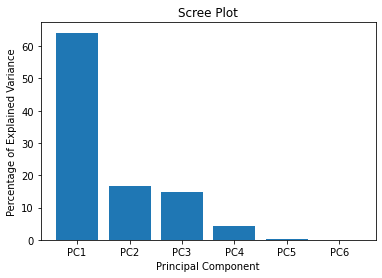

In [5]:
pca = PCA()
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)
# claculate the % of variation of each PC 
per_var = np.round(pca.explained_variance_ratio_ *100 , decimals =2)
# name each PC 
labels = ['PC' + str(i) for i in range(1, len(per_var) + 1)]
# Create graph
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

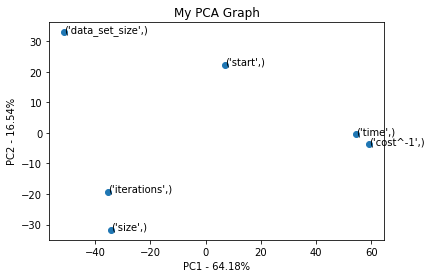

In [6]:
#the following code makes a fancy looking plot using PC1 and PC2
pca_df = pd.DataFrame(pca_data, index=[data.columns], columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()